**Abstract**

Breast cancer is cancer that forms in the cells of the breasts.

This dataset is from the UC Irvine Machine Learning Repository.

Number of instances: 569 

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

This project will detect breast cancer by checking the whether the tumor is benign (non-cancerous) or malignant (cancerous)

In [1]:
# Importing the necessary components
import scipy
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Insuring the notebook's graphs are seaborn standard
sns.set()

In [2]:
# Loading the dataset into a dataframe
names = ['id', 'clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_size','bare_nuclei',
         'bland_chromation','normal_nucleoli','nutises','class']
df = pd.read_csv('breast-cancer-wisconsin.data',names=names)
df.head(n=10)

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromation,normal_nucleoli,nutises,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
# Fixing the dataset column to 0 instead of 2 for benign tumors and 1 instead of 4 for malignant tumors
df['class']=df['class'].apply(lambda x: 0 if x == 2 else x)
df['class']=df['class'].apply(lambda x: 1 if x == 4 else x)

In [4]:
# Making sure the dataset is fixed
df.head(n=10)

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromation,normal_nucleoli,nutises,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0


In [5]:
# Preprocessing the dataset
# Replacing missing data with nan and ignoring the missing/null data
df.replace('?',np.nan, inplace=True)
# Printing information about the dataset
print(df.axes)
# Dropping the unnecessary id column
df.drop(['id'],1,inplace=True)
# Printing the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromation', 'normal_nucleoli', 'nutises', 'class'],
      dtype='object')]
(699, 10)


In [6]:
# Finding the null values in the dataset
df.isnull().sum()

clump_thickness            0
uniform_cell_size          0
uniform_cell_shape         0
marginal_adhesion          0
single_epithelial_size     0
bare_nuclei               16
bland_chromation           0
normal_nucleoli            0
nutises                    0
class                      0
dtype: int64

In [7]:
# Imputing the null values (Replacing the missing or null values with a particular value in the entire dataset)
from sklearn.impute import SimpleImputer

# Imputing the null values with the mode of the column
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromation,normal_nucleoli,nutises,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [8]:
# Visualizing the parameters of the dataset
# A benign tumor is represented by class 2 and class 4 represents a malignant tumor
print(df.loc[6])
# Printing the mean, standard deviation, and other statistical information
print(df.describe())

clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
single_epithelial_size     2
bare_nuclei               10
bland_chromation           3
normal_nucleoli            1
nutises                    1
class                      0
Name: 6, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromation  \
count         699.000000       

In [9]:
# Checking if there are any null values left over after imputing the null values
df_imputed.isnull().sum()

clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromation          0
normal_nucleoli           0
nutises                   0
class                     0
dtype: int64

In [10]:
# Finding the unique values in the columns to make sure no typos exist
for i in df_imputed.columns:
    print(i)
    print()
    # Converting the dataframe object to a list then turning that list into a set
    print(set(df_imputed[i].tolist()))
    print()

clump_thickness

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

uniform_cell_size

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

uniform_cell_shape

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

marginal_adhesion

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

single_epithelial_size

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

bare_nuclei

{'1', '6', '8', '2', '10', '9', '4', '7', '5', '3'}

bland_chromation

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

normal_nucleoli

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

nutises

{1, 2, 3, 4, 5, 6, 7, 8, 10}

class

{0, 1}



AxesSubplot(0.125,0.11;0.775x0.77)


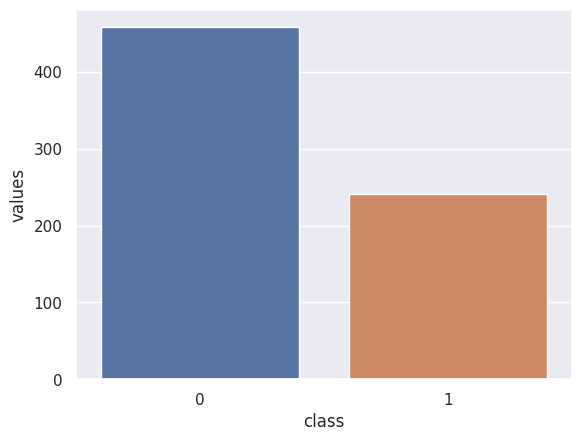

In [11]:
# Checking for label imbalance 
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a temporary dataframe to check how many times a particular value/class has occured
temp=df_imputed["class"].value_counts()
temp_df= pd.DataFrame({'class': temp.index,'values': temp.values})
print(sns.barplot(x = 'class', y="values", data=temp_df))

In [12]:
# Checking the data types of the main dataframe
df.dtypes

clump_thickness            int64
uniform_cell_size          int64
uniform_cell_shape         int64
marginal_adhesion          int64
single_epithelial_size     int64
bare_nuclei               object
bland_chromation           int64
normal_nucleoli            int64
nutises                    int64
class                      int64
dtype: object

In [13]:
# Finding the distribution of the data and making sure it follows a normal distribution (bell curve)
def distplots(col):
    sns.histplot(
    df[col], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)
    plt.show()
    
# Looping through each column except for object data types
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)

In [14]:
# Finding the outliers within the data using boxplots
def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

In [15]:
# Labeling encoding to convert categorical values to numerical values since the bare nuclei variable is supposed to be an integer
from sklearn import preprocessing

# Applying preprocessing to the entire dataframe
df_enco=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco.dtypes

clump_thickness           int64
uniform_cell_size         int64
uniform_cell_shape        int64
marginal_adhesion         int64
single_epithelial_size    int64
bare_nuclei               int64
bland_chromation          int64
normal_nucleoli           int64
nutises                   int64
class                     int64
dtype: object

In [16]:
# Saving the preprocessed dataframe as a .csv file
df_enco.to_csv("Breast_Cancer_Wisconson_Pre-Processed.csv")

<AxesSubplot: >

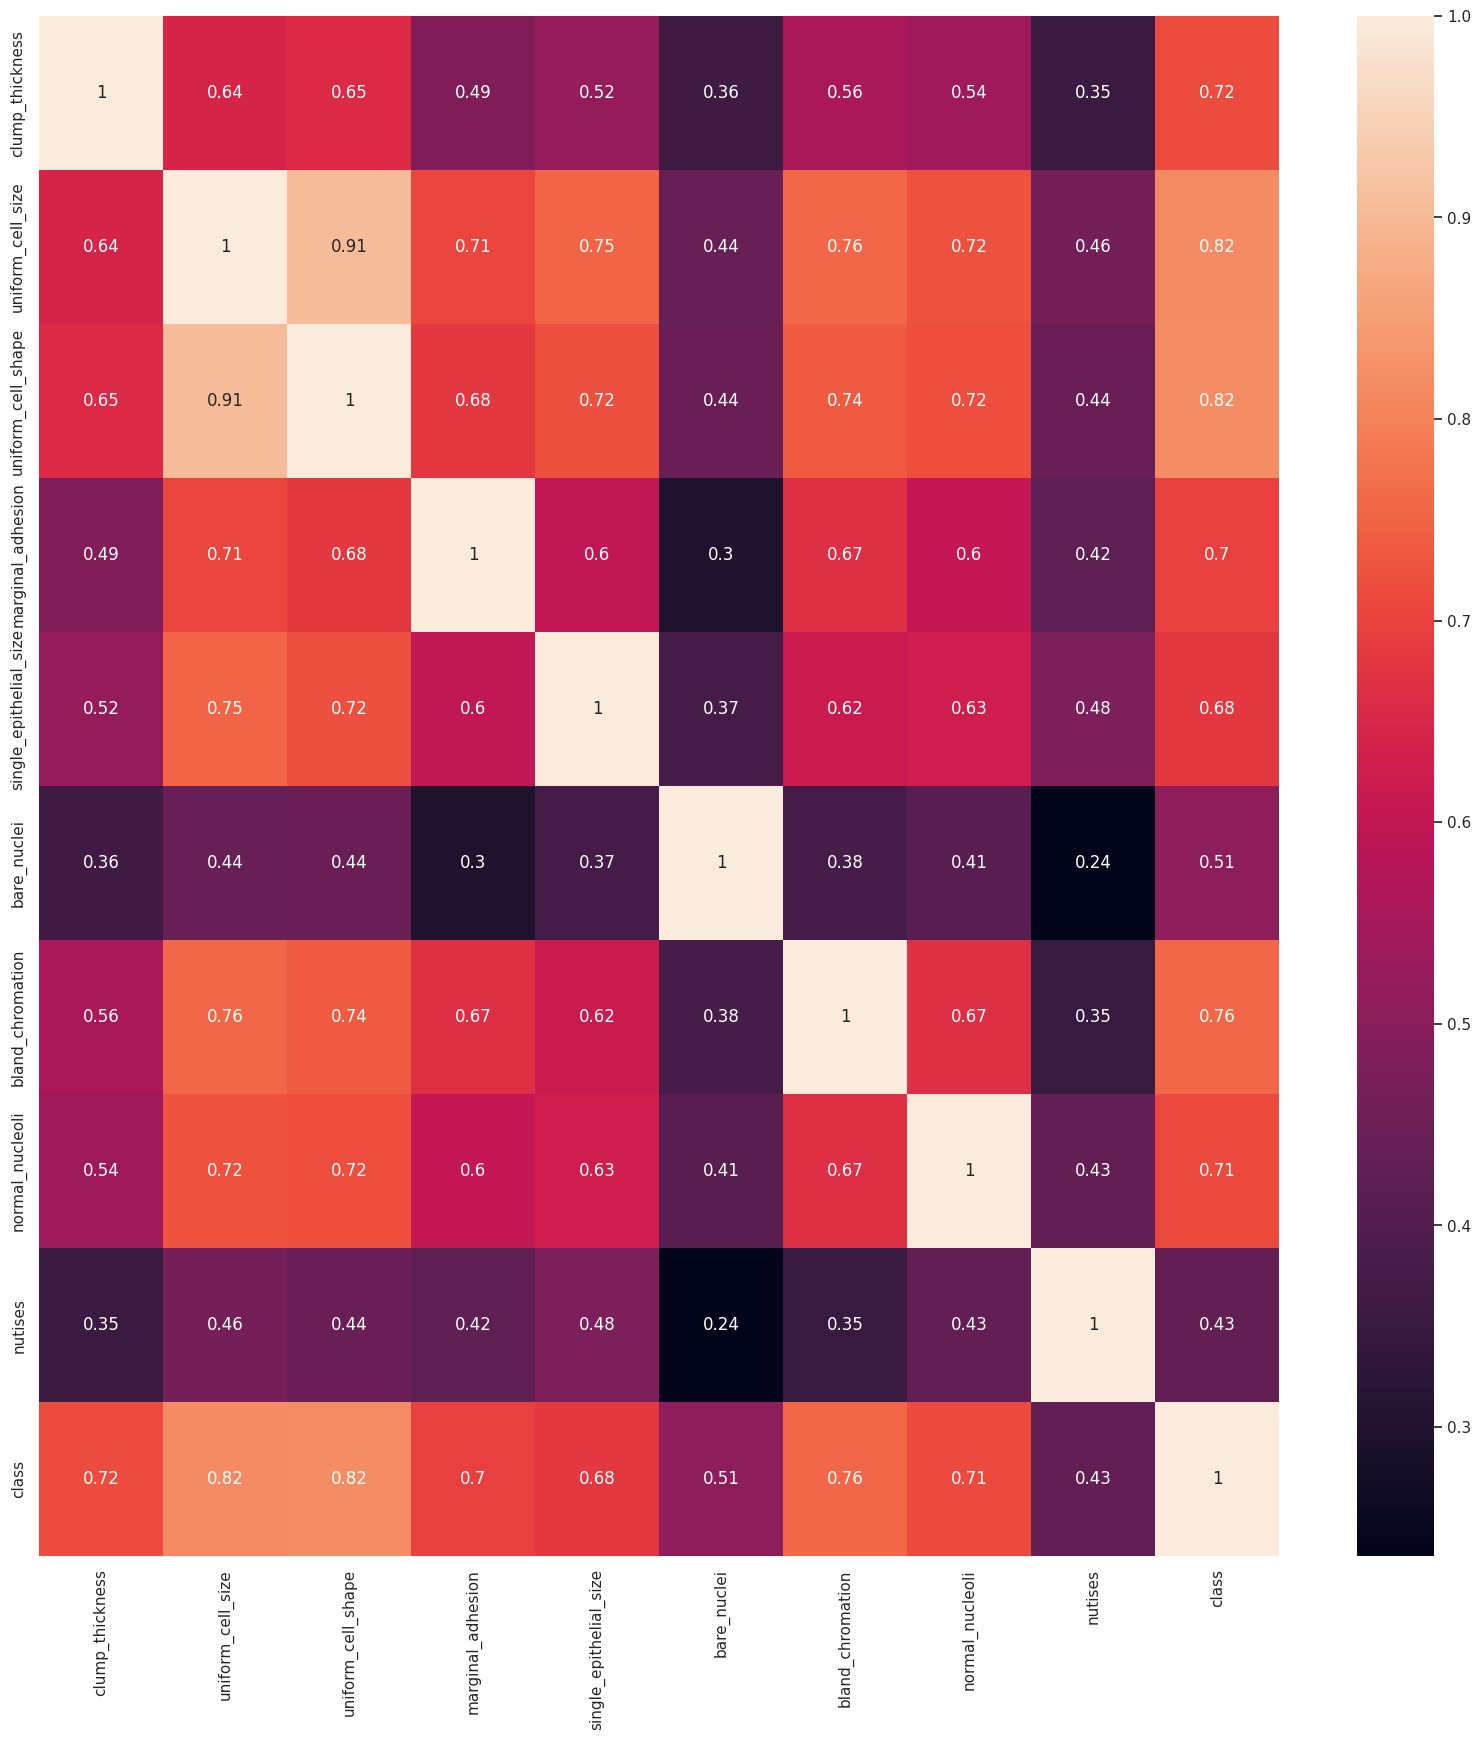

In [17]:
# Finding the correlations between the variables using a heatmap
# High correlations between two independent variables will cause issues
plt.figure(figsize=(20,20))
corr=df_enco.corr()
sns.heatmap(corr,annot=True)

In [18]:
# Seperating the independent and dependent variables
x=df_enco.drop(["class"],axis=1)
y=df_enco["class"]

In [19]:
# Checking the label imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print(Counter(y))

Counter({0: 458, 1: 241})


In [20]:
# Balancing the imbalanced labels using oversampling to preserve data
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(x, y)

# Checking for label imbalance
print(Counter(y_ros))

Counter({0: 458, 1: 458})


In [21]:
# Scaling using the MinMaxScaler to ensure there is no overfit when fitting data into the model
#.fit_transforms() fits to the data and transforms it.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

In [22]:
# Applying PCA (Principal Component Analysis) to choose the minimum number of principal components, so there is 95% of the variance.
# This allows for data to be represented as a smaller set of variables, so trends, clusters, outliers, etc. can be seen
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_PCA = pca.fit_transform(x)

# Checking that PCA has reduced to a smaller set of variables that preserve 95% of the variance.
print(x.shape)
print(X_PCA.shape)

(916, 9)
(916, 7)


In [23]:
# Splitting the dataset into the training and testing datasets while preserving 20% of the data for testing and 80% of the data for training
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_PCA, y, test_size=0.2, random_state=8)

In [24]:
# Appending two models to a models list (for KNN, 10 neighbors are used)
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=10)))
models.append(('SVM',SVC()))
# Evaluating each model
results =[]
names=[]
for name, model in models:
  # Performing k-fold cross validation with 10 runs (n_splits) to get the average result accuracy across runs (results are partitioned into k folds and the data for one partition is tested while the rest is trained on)
  kfold = model_selection.KFold(n_splits=10,random_state=8, shuffle=True)
  cv_results=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  message="{}: {:.5f}  ({:.5f})".format(name,cv_results.mean(),cv_results.std())
  print(message)

KNN: 0.96588  (0.01248)
SVM: 0.97682  (0.01362)


In [25]:
# Make predictions on validation dataset and creating a classification report that displays all evaluation matrices and shows accuracy, etc.
for name, model in models:
  # Retraining the model on x and y training data
  model.fit(x_train,y_train)
  # Making predictions
  predictions = model.predict(x_test)
  print(name)
  print(accuracy_score(y_test,predictions))
  print(classification_report(y_test,predictions))

KNN
0.9782608695652174
              precision    recall  f1-score   support

           0       0.99      0.96      0.98        83
           1       0.97      0.99      0.98       101

    accuracy                           0.98       184
   macro avg       0.98      0.98      0.98       184
weighted avg       0.98      0.98      0.98       184

SVM
0.9836956521739131
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        83
           1       0.97      1.00      0.99       101

    accuracy                           0.98       184
   macro avg       0.99      0.98      0.98       184
weighted avg       0.98      0.98      0.98       184



In [26]:
# Predicting breast cancer
Target_Classifcation = model.predict(x_test)
Target_Classifcation  = (Target_Classifcation >0.5)
# Creating a confusion matrix to check how many true positives (top left), false positives (top right), false negatives (bottom left), and true negatives (bottom right) the model produced
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Target_Classifcation))

[[ 80   3]
 [  0 101]]


In [27]:
# Importing the necessary components to create an ROC Curve and Precision/Recall Curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve, f1_score, confusion_matrix

# Creating a function to plot the ROC Curve to check the true positive to false negative rate and make sure the model is appropriate
def plot_auc(t_y, p_y):
    # fpr = False Positive Rate, tpr = True Positive Rate
    fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label=1)
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('classification', auc(fpr, tpr)))
    c_ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')

# Creating a function to plot the Precision/Recall Curve Precision, recall, and thresholds are used.
def plot_precision_recall_curve_helper(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
    aps = average_precision_score(t_y, p_y)
    c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)'  % ('classification', aps))
    c_ax.plot(recall, precision, color='red', lw=2)
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')

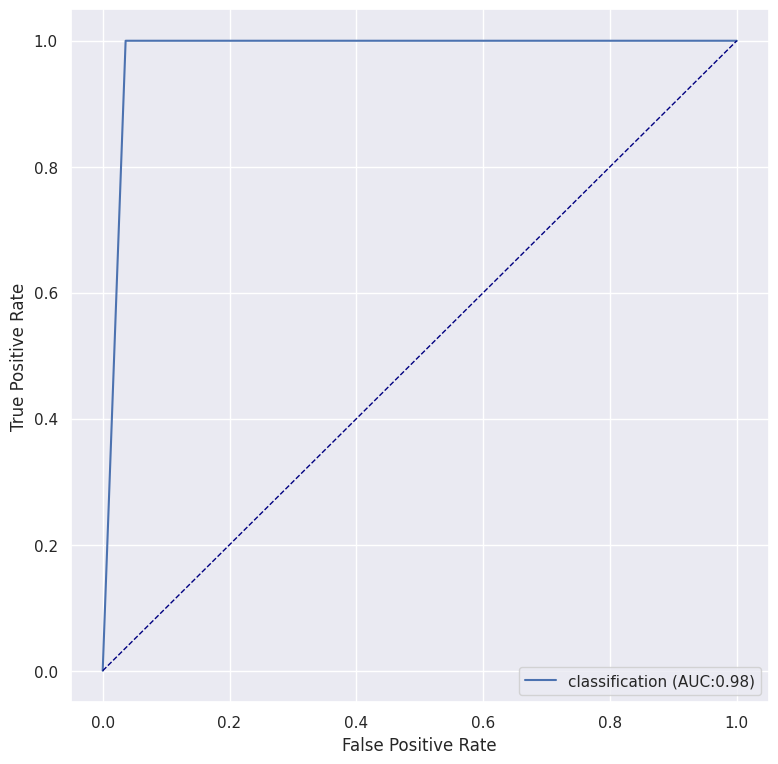

In [28]:
# Creating an ROC Curve using the ROC curve-generating function
# The closer the AUC is to 1, the better the model
plot_auc(y_test, model.predict(x_test))

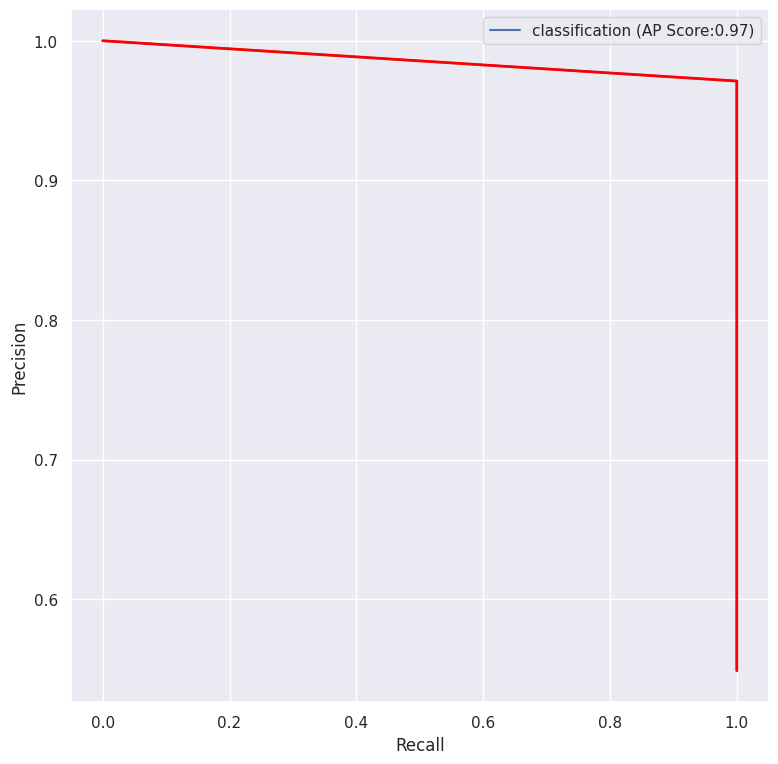

In [29]:
# Plotting the Precision/Recall Curve to check the tradeoff between precision (ratio of the retrieved items that are relevant) and recall (the ratio of relevant items that are retrieved)
plot_precision_recall_curve_helper(y_test, model.predict(x_test))

In [30]:
# Finding the threshold to optimize the model's performance 
# Using the threshold to make binary classification
# Calculating the F1 Score (a measure of the model's accuracy)
def calc_f1(prec,recall):
    # Using "if recall and prec else 0" to ensure division by 0 doesn't lead to an error
    return 2*(prec*recall)/(prec+recall) if recall and prec else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test))
# Using a list comprehension to call F1 Score calculation function above while looping through the threshold list, which contains the probability that precision and recall aren't in sync anymore
f1score = [calc_f1(precision[i],recall[i]) for i in range(len(thresholds))]
# Finding the argmax (the index of the value that maximizes the F1 Score)
index_max = np.argmax(f1score)
# Finding the threshold of the index that maximizes the F1 Score
threshold = thresholds[index_max]
print(threshold)
# Printing the precision, recall, threshold, and F1 Score of the index that maximizes the F1 Score
print('Precision: '+ str(precision[index_max]))
print('Recall: '+ str(recall[index_max]))
print('Threshold: '+ str(thresholds[index_max]))
print('F1 Score: ' + str(f1score[index_max]))

1
Precision: 0.9711538461538461
Recall: 1.0
Threshold: 1
F1 Score: 0.9853658536585366


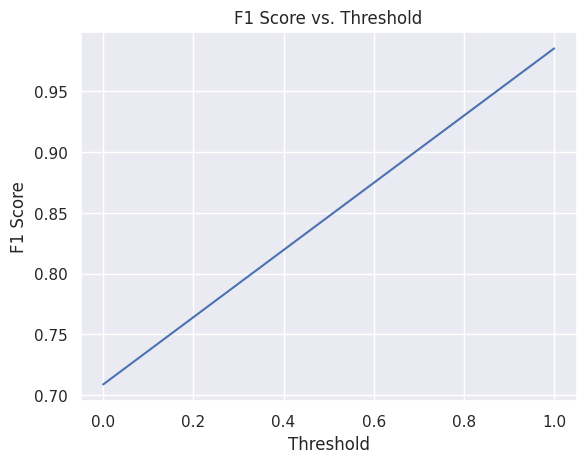

In [31]:
# Plotting the threshold (probability that a prediction of Breast Cancer is true) and F1 Score
plt.figure()
plt.plot(thresholds, f1score)
plt.title("F1 Score vs. Threshold")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a4a0418-c2fa-418c-b536-a3bbfe8eac00' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>